In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score

from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data=pd.read_csv("creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


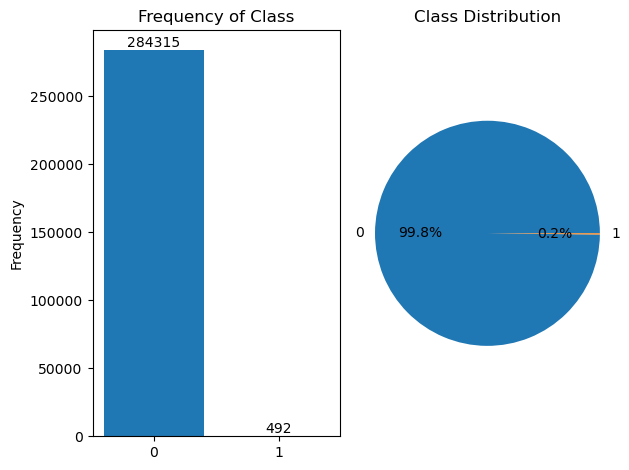

In [8]:
plt.subplot(1, 2, 1)
class_counts = data["Class"].value_counts()
plt.bar(class_counts.index.astype(str), class_counts)
for i, count in enumerate(class_counts):
    plt.text(i, count, str(count), ha="center", va="bottom")
plt.title("Frequency of Class")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.pie(class_counts, labels=class_counts.index.astype(str), autopct='%1.1f%%')
plt.axis("equal")
plt.title("Class Distribution")

plt.tight_layout()
plt.show()

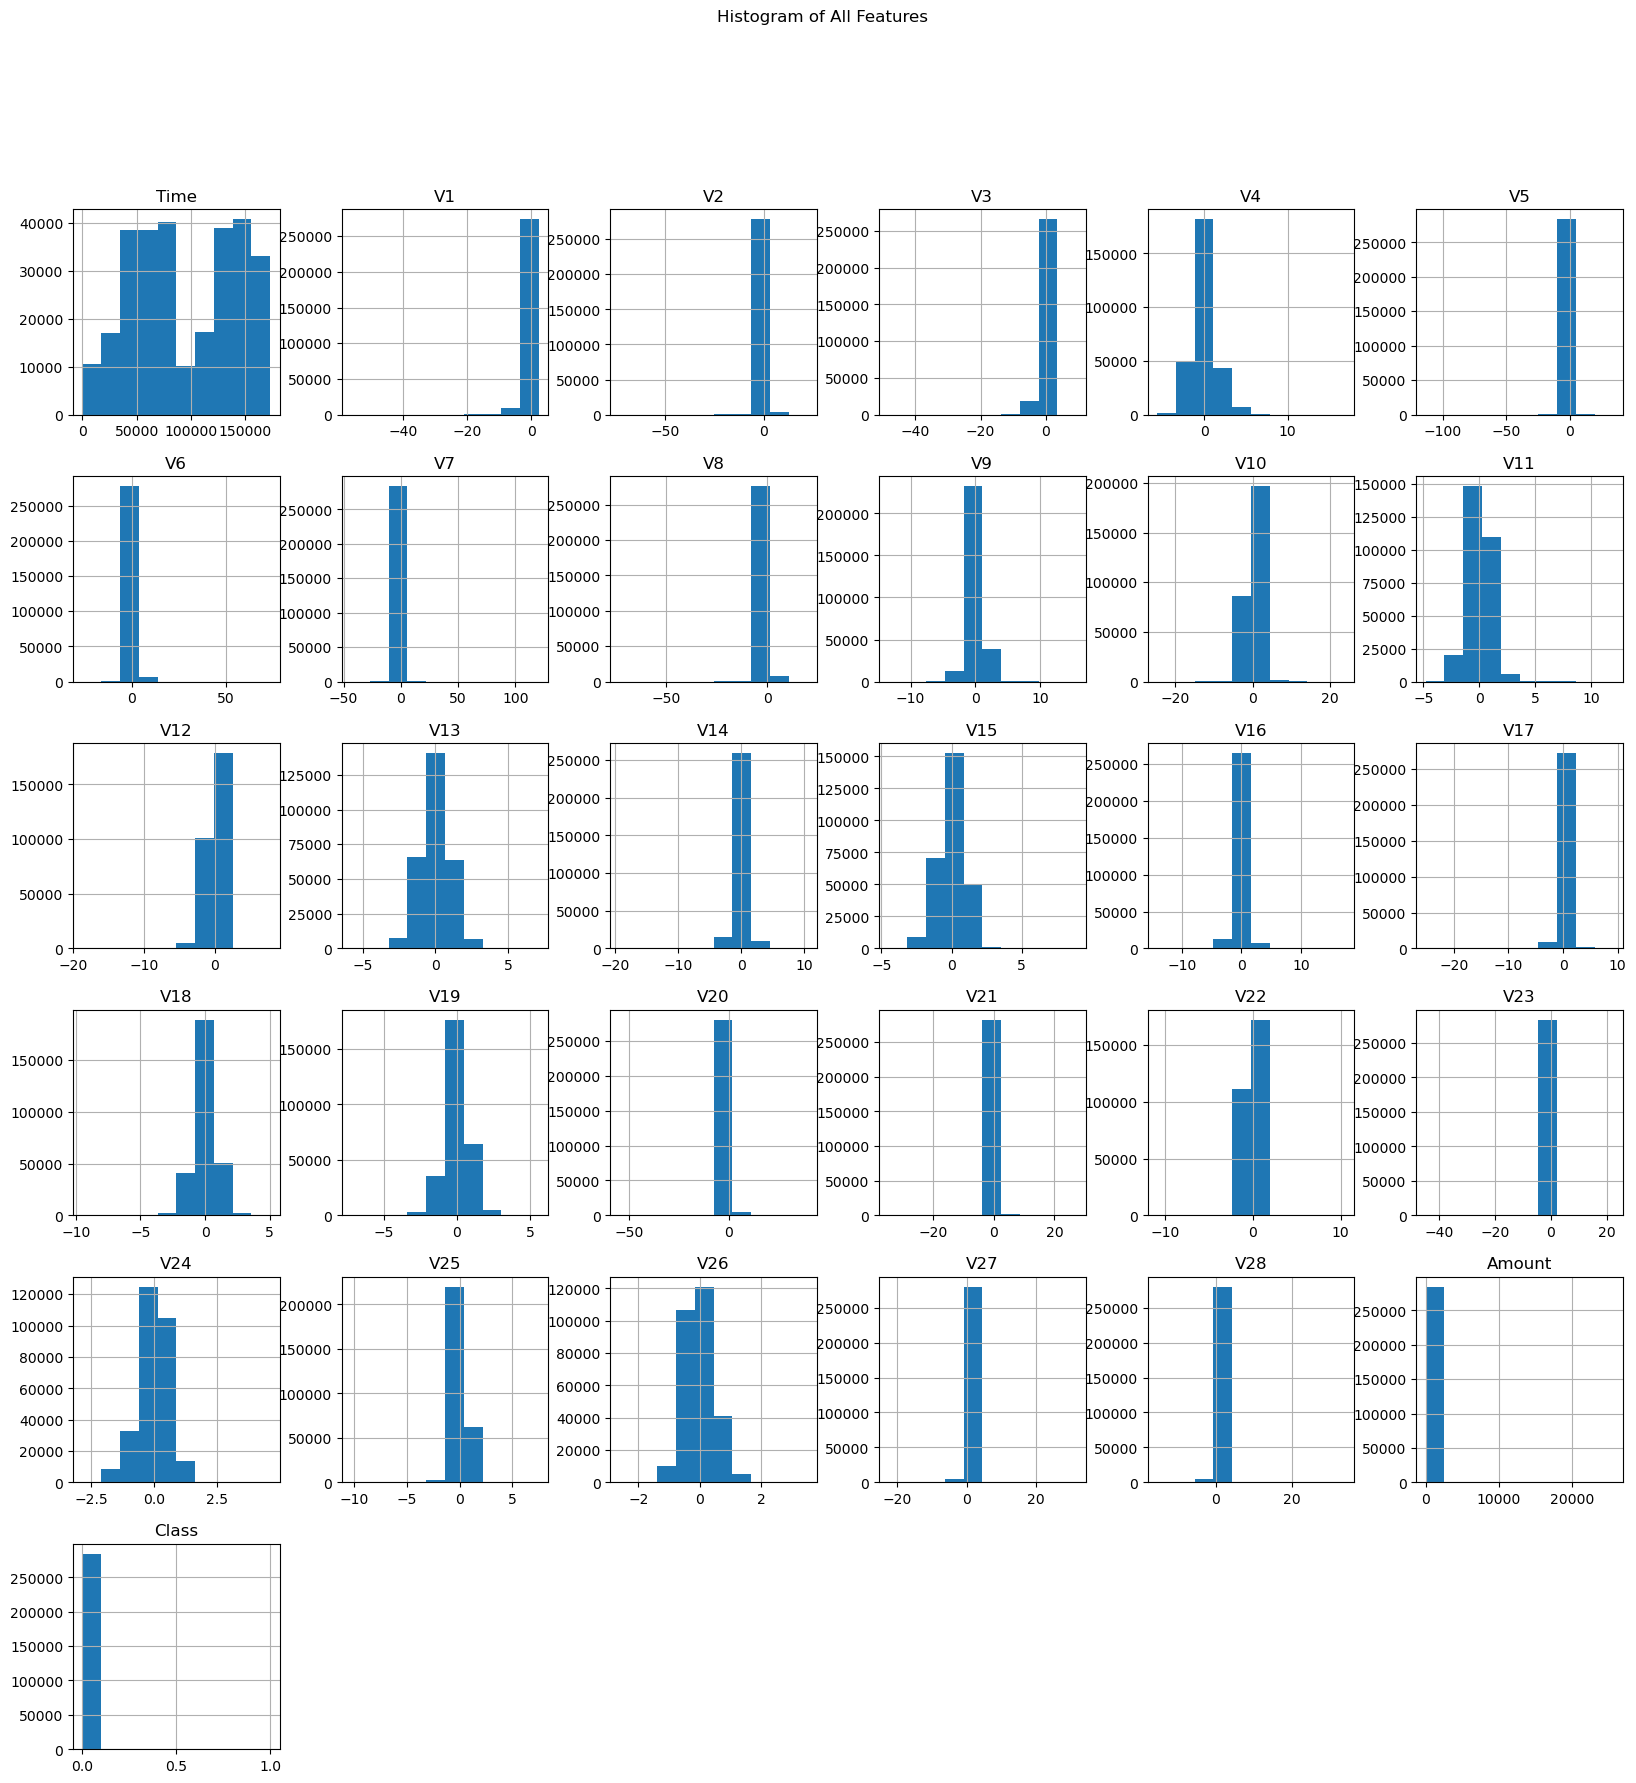

In [9]:
data.hist(figsize=(20, 20))
plt.suptitle("Histogram of All Features")
plt.show()

<Axes: >

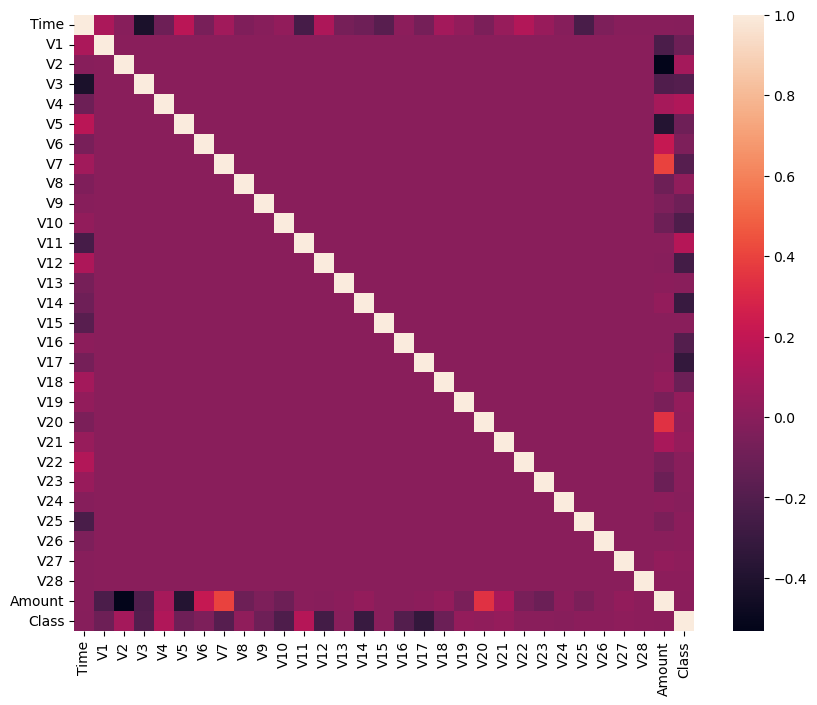

In [10]:
plt.figure(figsize=(10,8))
corr=data.corr()
sns.heatmap(corr)

In [11]:
x=data.drop("Class",axis=1)
y=data["Class"]

In [12]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [13]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

In [16]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [17]:
models={
    "Logistic Regression": LogisticRegression(),
    "SGD Classifier":SGDClassifier(),
    "Random Forest Classifier":RandomForestClassifier(n_estimators=100, n_jobs=-1),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "MultinomialNB":MultinomialNB(),
    "GaussianNB": GaussianNB(),
    "LinearSVC":LinearSVC(),
    "AdaBoost":AdaBoostClassifier(),
    "XGBClassifier":XGBClassifier()
}

In [18]:
for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Accuracy for {model_name}: {accuracy}")
    print(f"F1 Score for {model_name}: {f1}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, zero_division=0))  # Set zero_division=0 to avoid warnings
    print("="*50)

Training and evaluating Logistic Regression...
Accuracy for Logistic Regression: 0.9990519995786665
F1 Score for Logistic Regression: 0.6086956521739131
[[56866     8]
 [   46    42]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.84      0.48      0.61        88

    accuracy                           1.00     56962
   macro avg       0.92      0.74      0.80     56962
weighted avg       1.00      1.00      1.00     56962

Training and evaluating SGD Classifier...
Accuracy for SGD Classifier: 0.9990168884519505
F1 Score for SGD Classifier: 0.6000000000000001
[[56864    10]
 [   46    42]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.81      0.48      0.60        88

    accuracy                           1.00     56962
   macro avg       0.90      0.74      0.80     56962
weighted avg       1.00      1.00      1.00     

In [19]:
model=keras.Sequential([
    layers.Dense(64,activation="relu",input_shape=(x_train_scaled.shape[1],)),
    layers.Dense(64,activation="relu"),
    layers.Dense(1,activation="sigmoid")
])

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model.fit(x_train_scaled,y_train,epochs=10,batch_size=15)



Epoch 1/10


15190/15190 [==============================] - 44s 3ms/step - loss: 0.0063 - accuracy: 0.9988
Epoch 2/10
15190/15190 [==============================] - 42s 3ms/step - loss: 0.0042 - accuracy: 0.9993
Epoch 3/10
15190/15190 [==============================] - 42s 3ms/step - loss: 0.0041 - accuracy: 0.9993
Epoch 4/10
15190/15190 [==============================] - 44s 3ms/step - loss: 0.0040 - accuracy: 0.9992
Epoch 5/10
15190/15190 [==============================] - 42s 3ms/step - loss: 0.0039 - accuracy: 0.9993
Epoch 6/10
15190/15190 [==============================] - 42s 3ms/step - loss: 0.0038 - accuracy: 0.9993
Epoch 7/10
15190/15190 [==============================] - 43s 3ms/step - loss: 0.0038 - accuracy: 0.9993
Epoch 8/10
15190/15190 [==============================] - 43s 3ms/step - loss: 0.0037 - accuracy: 0.9993
Epoch 9/10
15190/15190 [==============================] - 42s 3ms/step - loss: 0.0037 - accuracy: 0.9993
Epoch 10/10
15190/15190 [==========================

In [25]:
pred_ann=model.predict(x_test)

1781/1781 [==============================] - 4s 2ms/step


Epoch 1/10
12152/12152 [==============================] - 43s 4ms/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0050 - val_accuracy: 0.9991
Epoch 2/10
12152/12152 [==============================] - 41s 3ms/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0037 - val_accuracy: 0.9993
Epoch 3/10
12152/12152 [==============================] - 41s 3ms/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 4/10
12152/12152 [==============================] - 41s 3ms/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0032 - val_accuracy: 0.9995
Epoch 5/10
12152/12152 [==============================] - 42s 3ms/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 6/10
12152/12152 [==============================] - 43s 4ms/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.0059 - val_accuracy: 0.9989
Epoch 7/10
12152/12152 [==============================] - 41s 3ms/step - loss: 0.0035 - accuracy: 0.9994 - val_loss: 0

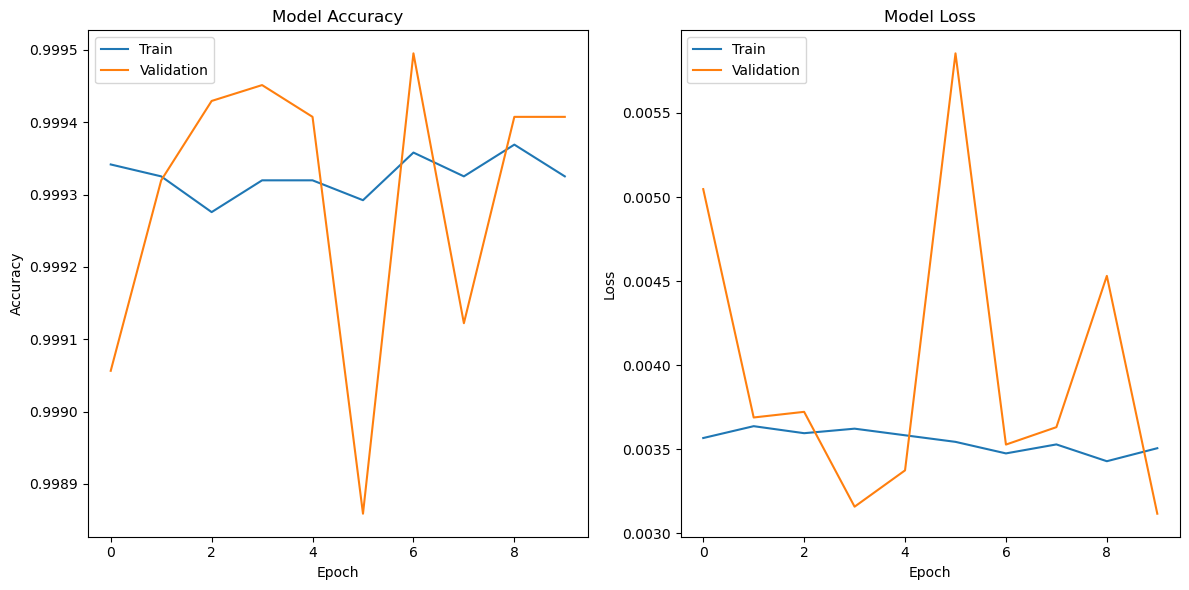

In [26]:
history = model.fit(x_train_scaled, y_train, epochs=10, batch_size=15, validation_split=0.2)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

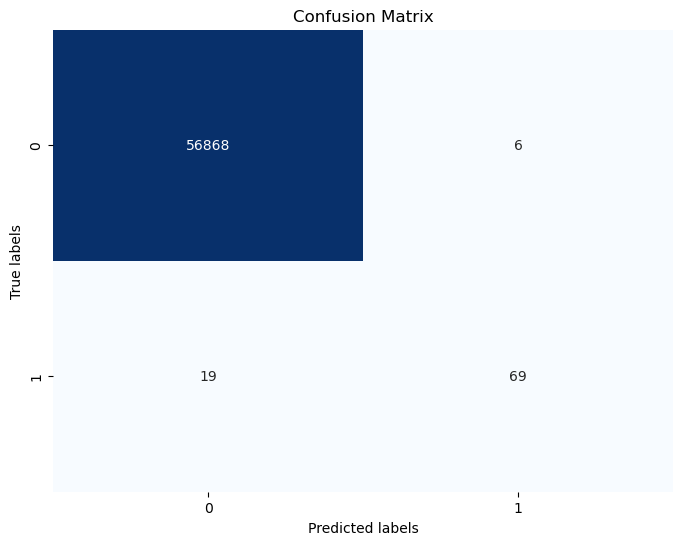

In [27]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
